In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
# os.chdir("drive/MyDrive") 
path = 'LendingClubLoanData.csv'
data = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Analysis

In [3]:
data.shape

(298209, 151)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,75184391,NaN,7400.0,7400.0,7400.0,36 months,16.29,261.23,D,D1,Manager,10+ years,RENT,65000.0,Not Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,vacation,Vacation,926xx,CA,22.99,2.0,Aug-2004,675.0,679.0,1.0,4.0,NaN,9.0,0.0,1314.0,36.5,25.0,w,0.00,0.00,...,73410.0,102394.0,3600.0,69810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,75102516,NaN,8000.0,8000.0,8000.0,36 months,8.39,252.14,B,B1,Commercial lender,< 1 year,MORTGAGE,100000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,826xx,WY,8.92,0.0,Feb-1992,675.0,679.0,0.0,76.0,76.0,9.0,1.0,2912.0,27.7,33.0,w,0.00,0.00,...,400981.0,17017.0,9800.0,24181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,75173582,NaN,20000.0,20000.0,20000.0,36 months,13.67,680.36,C,C3,Nurse,9 years,RENT,53000.0,Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,421xx,KY,16.89,0.0,Jun-2006,695.0,699.0,1.0,NaN,NaN,9.0,0.0,10375.0,86.5,26.0,w,0.00,0.00,...,115889.0,23753.0,10500.0,25640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,75132215,NaN,10075.0,10075.0,10075.0,36 months,15.31,350.79,C,C5,Lead Merchandiser,6 years,RENT,28000.0,Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,952xx,CA,7.72,0.0,Dec-2007,700.0,704.0,1.0,NaN,NaN,4.0,0.0,6743.0,68.8,5.0,w,0.00,0.00,...,9800.0,6743.0,6800.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,75215337,NaN,35000.0,35000.0,35000.0,36 months,16.29,1235.52,D,D1,Area Security Officer,10+ years,MORTGAGE,115000.0,Source Verified,Mar-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,201xx,VA,26.84,1.0,Mar-2001,670.0,674.0,0.0,8.0,NaN,21.0,0.0,45567.0,82.1,41.0,w,1222.95,1222.95,...,729753.0,75684.0,27400.0,110003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe(include = 'all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,298209.0,0.0,298207.000000,298207.000000,298207.000000,298207,298207.000000,298207.000000,298207,298207,281529,281565,298206,2.982060e+05,298206,298206,298206,298206,298206,17,298206,288623,298206,298206,298196.000000,298206.000000,298206,298206.000000,298206.000000,298205.000000,152824.000000,51890.000000,298206.000000,298206.000000,2.982060e+05,298044.000000,298206.000000,298206,298206.000000,298206.000000,...,2.982060e+05,2.982060e+05,2.982060e+05,2.982060e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298206,1496,1496,1496,1496.0,1496.000000,1496,1496,1496,1496.0,1496.000000,1496,1166.000000,1496.000000,1496.000000,298206,298206,6822,6822,6822,6822.000000,6822.000000,6822.000000
unique,298209.0,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,90506,11,4,NaN,3,12,7,2,298206,10,13,35,905,50,NaN,NaN,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,9,3,NaN,NaN,26,28,27,NaN,NaN,4,NaN,NaN,NaN,2,2,53,3,54,NaN,NaN,NaN
top,46661631.0,NaN,NaN,NaN,NaN,36 months,NaN,NaN,C,C1,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt consolidation,750xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,NaN,NaN,Sep-2017,Dec-2017,Sep-2017,NaN,NaN,Late (16-30 days),NaN,NaN,NaN,Cash,N,Jun-2018,COMPLETE,Oct-2017,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN,NaN,207275,NaN,NaN,82799,18056,5769,101267,149700,NaN,123278,45163,217459,298181,1,8,177977,172421,3254,41610,NaN,NaN,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298167,1496,373,1127,NaN,NaN,342,245,254,NaN,NaN,685,NaN,NaN,NaN,296679,291384,413,3393,303,NaN,NaN,NaN
mean,NaN,NaN,15151.976982,15151.976982,15146.325438,NaN,13.156293,447.497414,NaN,NaN,NaN,NaN,NaN,7.704644e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750109,0.345174,NaN,693.802422,697.802529,0.670576,33.580537,68.584698,11.897054,0.225777,1.753086e+04,54.082749,25.760032,NaN,557.764483,557.590130,...,1.760085e+05,5.114667e+04,2.162103e+04,4.248317e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,136.821912,NaN,NaN,NaN,3.0,14.384358,NaN,399.163276,10200.815421,189.559813,NaN,NaN,NaN,NaN,NaN,4827.149527,47.210029,11.978012
std,NaN,NaN,8613.813481,8613.813481,8611.444231,NaN,4.555197,250.200762,NaN,NaN,NaN,NaN,NaN,6.583543e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.754299,0.906891,NaN,30.305199,30.305736,0.970267,21.878376,26.761618,5

In [6]:
num_feature = data.select_dtypes(include = ['number']).columns
num_feature

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       ...
       'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=114)

In [7]:
cat_feature = data.select_dtypes(include = ['object']).columns
cat_feature

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

# Data Processing

In [8]:
# Define the function to calculate the proportion of each feature missing
def CalculateMissing(data):
    null_count = data.isnull().sum().sort_values(ascending = False)
    ratio = null_count/len(data)
    nulldata = pd.concat([null_count,ratio],axis = 1, keys=['count','ratio'])
    return nulldata[ratio>0]

CalculateMissing(data)

,count,ratio
sec_app_revol_util,298209,1.000000
sec_app_fico_range_high,298209,1.000000
sec_app_inq_last_6mths,298209,1.000000
sec_app_mort_acc,298209,1.000000
sec_app_open_acc,298209,1.000000
...,...,...
int_rate,2,0.000007
term,2,0.000007
funded_amnt_inv,2,0.000007
funded_amnt,2,0.000007


In [9]:
# Use dropna to delete features with a percentage of missing values greater than 50%
half_count = len(data)/2 
data = data.dropna(thresh = half_count, axis = 1 ) 

In [10]:
data.shape

(298209, 94)

In [11]:
CalculateMissing(data)

,count,ratio
mths_since_last_delinq,145385,0.487527
mths_since_recent_inq,29133,0.097693
emp_title,16680,0.055934
emp_length,16644,0.055813
num_tl_120dpd_2m,12189,0.040874
...,...,...
int_rate,2,0.000007
term,2,0.000007
funded_amnt_inv,2,0.000007
funded_amnt,2,0.000007


### Fill missing values

In [12]:
# Filtering numerical features
num_feature = data.select_dtypes('number')
num_names = num_feature.columns
num_names

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', '

In [13]:
num_zero = ['num_tl_120dpd_2m','bc_util']
num_100  = ['mths_since_recent_inq']
data[num_zero] = data[num_zero].fillna(0)
data[num_100] = data[num_100].fillna(100)

In [14]:
# Filtering numerical features containing missing values
num_null = CalculateMissing(data).index
nominal_null_feature = [i for i in num_null if i in num_names]
# Filling the mean
data[nominal_null_feature] = data[nominal_null_feature].fillna(data[nominal_null_feature].mean())

In [15]:
cat_feature =  data.select_dtypes('object')
cat_names = cat_feature.columns
cat_names

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [16]:
data[cat_names] = data[cat_names].fillna('Unknown')
data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 94, dtype: int64

## Handling outliers

In [17]:
des = data.describe()
des.sort_values(by = 'std',ascending = False,axis = 1)

,tot_hi_cred_lim,tot_cur_bal,annual_inc,total_bal_ex_mort,total_il_high_credit_limit,total_rev_hi_lim,revol_bal,total_bc_limit,avg_cur_bal,bc_open_to_buy,total_pymnt,total_pymnt_inv,funded_amnt,loan_amnt,funded_amnt_inv,total_rec_prncp,last_pymnt_amnt,total_rec_int,out_prncp,out_prncp_inv,tot_coll_amt,recoveries,delinq_amnt,installment,collection_recovery_fee,last_fico_range_low,mo_sin_old_rev_tl_op,last_fico_range_high,mo_sin_old_il_acct,percent_bc_gt_75,mths_since_recent_bc,fico_range_high,fico_range_low,mths_since_recent_inq,bc_util,revol_util,mo_sin_rcnt_rev_tl_op,mths_since_last_delinq,total_rec_late_fee,total_acc,mo_sin_rcnt_tl,dti,pct_tl_nvr_dlq,num_rev_accts,num_il_tl,open_acc,num_sats,num_bc_tl,int_rate,num_op_rev_tl,num_actv_rev_tl,num_rev_tl_bal_gt_0,acc_open_past_24mths,num_bc_sats,num_actv_bc_tl,mort_acc,num_tl_op_past_12m,num_accts_ever_120_pd,inq_last_6mths,delinq_2yrs,pub_rec,num_tl_90g_dpd_24m,tax_liens,pub_rec_bankruptcies,collections_12_mths_ex_med,chargeoff_within_12_mths,acc_now_delinq,num_tl_30dpd,num_tl_120dpd_2m,policy_code
count,2.982090e+05,2.982090e+05,2.982090e+05,2.982090e+05,2.982090e+05,2.982090e+05,2.982090e+05,2.982090e+05,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.00000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,2.982090e+05,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.000000,298209.0
mean,1.760085e+05,1.429526e+05,7.704644e+04,5.114667e+04,4.248317e+04,3.322135e+04,1.753086e+04,2.162103e+04,13419.533900,9446.523800,16068.078393,16062.168969,15151.976982,15151.976982,15146.325438,12730.164143,4379.947934,3104.441235,557.764483,557.590130,242.941943,231.69401,13.857917,447.497414,39.627316,662.395676,186.426071,677.675992,128.006145,48.305632,24.168110,697.802529,693.802422,15.959129,62.048247,54.082749,13.097523,33.580537,1.778996e+00,25.760032,7.923868,18.750109,94.167764,15.049308,8.669259,11.897054,11.845989,8.279968,13.156293,8.414227,5.857367,5.815990,4.588650,4.767862,3.741893,1.760904,2.118160,0.511502,0.670576,0.345174,0.225777,0.092721,0.060254,0.131956,0.017857,0.010392,0.006197,0.004162,0.000872,1.0
std,1.794719e+05,1.576120e+05,6.583510e+04,4.813535e+04,4.331580e+04,3.860950e+04,2.410752e+04,2.161575e+04,15974.957002,14361.000266,10387.966671,10385.055043,8613.784595,8613.784595,8611.415353,8543.698296,6321.035534,3151.422356,2255.823991,2255.072371,2019.039497,950.54333,682.262066,250.199923,167.633383,126.185329,94.876753,80.223874,50.970177,35.413615,30.822418,30.305584,30.305047,28.220992,27.838379,23.703454,16.401668,15.662093,1.250735e+01,12.022685,8.800730,8.754108,8.590890,8.162872,7.432895,5.504865,5.491774,4.795918,4.555181,4.546339,3.338549,3.274194,3.081505,2.934083,2.267161,2.058895,1.762096,1.297393,0.970261,0.906887,0.608039,0.498712,0.400888,0.379197,0.155146,0.115131,0.083928,0.068856,0.030300,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,30.120000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,664.000000,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.900000e-09,2.000000,0.000000,-1.000000,7.100000,2.000000,0.000000,1.000000,1.000000,0.000000,5.320000,

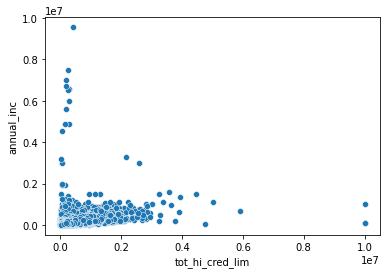

In [18]:
import seaborn as sns
sns.scatterplot(x = 'tot_hi_cred_lim', y = 'annual_inc', data = data)

In [19]:
data[data['tot_hi_cred_lim'] > 5000000]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
22792,73926184,25000.0,25000.0,25000.0,36 months,5.32,752.87,A,A1,ramp agent,10+ years,MORTGAGE,80000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,926xx,CA,13.05,0.0,Nov-1996,735.0,739.0,0.0,32.0,14.0,0.0,23090.0,44.7,30.0,w,0.0,0.0,27095.911784,27095.91,25000.0,...,519642.0,51600.0,4.0,37117.0,13366.0,58.7,0.0,0.0,123.0,232.0,10.0,10.0,4.0,10.0,10.0,2.0,6.0,8.0,7.0,11.0,6.0,12.0,20.0,8.0,14.0,0.0,0.0,0.0,3.0,93.3,28.6,0.0,0.0,9999999.0,23767.0,32400.0,14000.0,N,Cash,N
78236,70552580,13000.0,13000.0,13000.0,36 months,14.46,447.22,C,C4,Engineer,10+ years,MORTGAGE,110000.0,Source Verified,Feb-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,207xx,MD,13.04,0.0,Jul-2003,685.0,689.0,2.0,24.0,14.0,0.0,12976.0,52.8,24.0,w,0.0,0.0,15801.265846,15801.27,13000.0,...,346298.0,21000.0,6.0,24736.0,1126.0,82.7,0.0,0.0,135.0,150.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,8.0,4.0,8.0,5.0,9.0,16.0,8.0,14.0,0.0,0.0,0.0,6.0,90.5,75.0,0.0,0.0,9999999.0,39504.0,10900.0,42740.0,N,Cash,N
114723,68537848,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,Prinicpal,9 years,OWN,685000.0,Source Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,902xx,CA,16.97,3.0,Sep-1983,685.0,689.0,1.0,14.0,15.0,0.0,748557.0,91.1,34.0,w,0.0,0.0,22715.851554,22715.85,20000.0,...,5445012.0,802700.0,2.0,388929.0,6025.0,91.1,0.0,0.0,143.0,387.0,84.0,9.0,7.0,84.0,0.0,4.0,6.0,7.0,6.0,8.0,14.0,8.0,12.0,7.0,15.0,0.0,0.0,2.0,1.0,78.8,83.3,0.0,0.0,5915440.0,844650.0,102700.0,123475.0,N,Cash,N
120854,36271267,35000.0,35000.0,35000.0,36 months,12.39,1169.04,C,C1,Partner,10+ years,MORTGAGE,1100000.0,Verified,Dec-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,282xx,NC,31.39,3.0,Apr-1988,665.0,669.0,0.0,1.0,9.0,0.0,128554.0,98.0,25.0,f,0.0,0.0,41635.358982,41635.36,35000.0,...,4026405.0,135000.0,1.0,447378.0,5751.0,0.0,0.0,9751.0,137.0,263.0,70.0,23.0,3.0,263.0,100.0,0.0,1.0,3.0,1.0,3.0,10.0,3.0,11.0,3.0,8.0,0.0,1.0,0.0,0.0,88.0,100.0,0.0,0.0,5022617.0,500404.0,100000.0,649004.0,N,Cash,N
187767,28422899,26200.0,26200.0,26200.0,36 months,7.69,817.28,A,A4,Executive,3 years,MORTGAGE,999999.0,Verified,Oct-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,068xx,CT,13.30,0.0,Feb-1986,720.0,724.0,0.0,54.0,16.0,0.0,2560703.0,16.3,31.0,f,0.0,0.0,29421.720822,29421.72,26200.0,...,3840795.0,9999999.0,5.0,240050.0,24284.0,39.5,0.0,0.0,137.0,334.0,10.0,9.0,6.0,10.0,9.0,0.0,5.0,7.0,6.0,9.0,10.0,10.0,14.0,7.0,16.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,9999999.0,2688920.0,147700.0,95987.0,N,Cash,N
194988,27040189,34000.0,34000.0,34000.0,36 months,18.99,1246.14,E,E1,owner,10+ years,MORTGAGE,80000.0,Verified,S

In [20]:
data.drop([78236,114723,120854,187767], axis = 0, inplace = True)

#### Using IsolationForest remove outliers

In [21]:
data.shape

(298205, 94)

In [22]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
# Remove outliers mask indicates rows that do not contain outliers
yhat = iso.fit_predict(data[num_names])
mask = yhat != -1
data_iso = data.values[mask, :]
data_iso = pd.DataFrame(data_iso,columns = data.columns)
# Converting data types
data_iso[num_names] = data_iso[num_names].astype('int')
data_iso.shape

(291050, 94)

In [23]:
data_iso.describe().sort_values(by = 'std',axis = 1,ascending = False)

,tot_hi_cred_lim,tot_cur_bal,annual_inc,total_bal_ex_mort,total_il_high_credit_limit,total_rev_hi_lim,total_bc_limit,revol_bal,avg_cur_bal,bc_open_to_buy,total_pymnt,total_pymnt_inv,funded_amnt,loan_amnt,funded_amnt_inv,total_rec_prncp,last_pymnt_amnt,total_rec_int,out_prncp,out_prncp_inv,tot_coll_amt,recoveries,delinq_amnt,installment,collection_recovery_fee,last_fico_range_low,mo_sin_old_rev_tl_op,last_fico_range_high,mo_sin_old_il_acct,percent_bc_gt_75,mths_since_recent_bc,fico_range_high,fico_range_low,mths_since_recent_inq,bc_util,revol_util,mo_sin_rcnt_rev_tl_op,mths_since_last_delinq,total_acc,total_rec_late_fee,dti,pct_tl_nvr_dlq,mo_sin_rcnt_tl,num_rev_accts,num_il_tl,open_acc,num_sats,num_bc_tl,int_rate,num_op_rev_tl,num_actv_rev_tl,num_rev_tl_bal_gt_0,acc_open_past_24mths,num_bc_sats,num_actv_bc_tl,mort_acc,num_tl_op_past_12m,num_accts_ever_120_pd,inq_last_6mths,delinq_2yrs,pub_rec,num_tl_90g_dpd_24m,tax_liens,pub_rec_bankruptcies,collections_12_mths_ex_med,chargeoff_within_12_mths,acc_now_delinq,num_tl_30dpd,num_tl_120dpd_2m,policy_code
count,2.910500e+05,2.910500e+05,2.910500e+05,291050.000000,2.910500e+05,2.910500e+05,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.000000,291050.0
mean,1.672196e+05,1.357681e+05,7.461181e+04,49057.325147,4.137426e+04,3.113399e+04,20616.056296,16269.792847,12953.941759,8902.313001,15744.019433,15738.233115,14839.183223,14839.183223,14833.643920,12505.210253,4306.001113,3016.278241,522.691087,522.529881,241.332606,220.745975,10.393372,438.094798,37.617303,662.352142,184.684460,677.602127,127.586002,48.410064,23.903597,697.549558,693.549473,15.981367,61.872555,53.758547,12.946394,33.421151,25.398674,1.585703,18.256894,93.983505,7.883958,14.816406,8.588256,11.708621,11.659753,8.139048,12.534939,8.271201,5.770204,5.733929,4.550438,4.665539,3.680543,1.719004,2.098949,0.501474,0.663065,0.329287,0.225779,0.084391,0.058399,0.133853,0.017193,0.009194,0.005528,0.003683,0.000763,1.0
std,1.573727e+05,1.407488e+05,6.070986e+04,42632.646703,4.085419e+04,2.667981e+04,19219.043509,17114.915536,14680.666800,12758.760575,10088.404328,10085.651121,8359.561737,8359.561737,8357.312589,8328.747375,6182.528223,3022.679160,2141.724547,2141.020168,1996.418037,904.051480,552.991585,242.179078,159.160636,125.995648,93.960827,80.092541,50.872424,35.382162,30.039810,29.991294,29.990858,28.198498,27.670505,23.559111,15.947698,15.600610,11.639047,10.997690,8.739162,8.655528,8.594661,7.837217,7.313303,5.208019,5.198410,4.591898,4.498310,4.276588,3.170447,3.122917,2.998770,2.733396,2.150636,2.017660,1.721394,1.260611,0.961403,0.854744,0.602545,0.444298,0.391029,0.381155,0.147894,0.106375,0.079080,0.064639,0.028223,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,664.000000,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-1.000000,7.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.00000

## Filtering redundant features

In [24]:
drop_features = ['emp_title','id','policy_code','zip_code','addr_state','url',
                 'last_pymnt_d','collection_recovery_fee',
                 'last_pymnt_amnt','issue_d','title','sub_grade','last_credit_pull_d',
                 'earliest_cr_line']
data_iso.drop(drop_features,axis=1,inplace = True)

# Feature Engineering

In [25]:
# fico score mean
data_iso['fico_avg'] = (data_iso['fico_range_low']+data_iso['fico_range_high'])/2
# User installment account credit utilization rate
# data_iso['installment_ratio'] =  data_iso['total_bal_il']/ data_iso['total_il_high_credit_limit']
# Revolving Loan Line of Credit Utilization
data_iso['credit_revolving_ratio'] = data_iso['revol_bal']/ data_iso['total_rev_hi_lim']
# Total credit utilization rate
data_iso['total_ratio'] =  data_iso['total_bal_ex_mort']/ data_iso['tot_hi_cred_lim']
# Number of borrowing accounts = Number of mortgage accounts + Number of installment accounts + Number of revolving accounts
data_iso['num_accounts'] = data_iso['mort_acc'] + data_iso['num_il_tl'] + data_iso['num_rev_accts']

In [26]:
# Convert 'loan_status' to the form of 0 and 1. No default (Current, Fully Paid) is represented by 0 and the rest is represented by 1
map_loan_status = {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1}
data_iso['loan_status']= data_iso['loan_status'].map(map_loan_status)
data_iso['loan_status'] = data_iso['loan_status'].astype('object')
# Filtering numerical features
num_features = data_iso.select_dtypes('number')
num_names = num_features.columns
# Because the new features constructed may reintroduce infinite and missing values, they have to be processed again
data_iso.replace([np.inf, -np.inf], np.nan, inplace=True)
data_iso.fillna(0, inplace=True)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 2))
data_iso[num_names] = scaler.fit_transform(data_iso[num_names])
data_iso[num_names].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_avg,credit_revolving_ratio,total_ratio,num_accounts
0,1.164103,1.164103,1.168897,1.478261,1.156823,1.006806,1.051339,1.090909,1.081081,1.080645,1.166667,1.020833,1.125000,1.000000,1.002475,1.040359,1.149351,1.000000,1.00000,1.153411,1.153411,1.185000,1.074792,1.0,1.0,1.781176,1.781065,1.0,1.0,1.0,1.046985,1.003493,1.065217,1.031722,1.010448,1.141176,1.0,1.0,1.247772,1.126031,1.010753,1.014134,1.000000,1.006494,1.04,1.066667,1.100000,1.076923,1.065217,1.051724,1.146667,1.066667,1.011905,1.081081,1.125000,1.0,1.0,1.090909,1.033333,1.838710,1.00,1.000000,1.0,1.007341,1.129184,1.013704,1.058964,1.080863,1.040904,1.368822,1.149351
1,1.179487,1.179487,1.184194,1.130435,1.150713,1.010471,1.020089,1.000000,1.081081,1.080645,1.000000,1.395833,1.125000,1.027027,1.005485,1.030269,1.201299,1.000000,1.00000,1.133790,1.133790,1.200000,1.007103,1.0,1.0,1.845882,1.846154,1.0,1.0,1.0,1.175890,1.010189,1.086957,1.152683,1.031481,1.113725,1.0,1.0,1.213904,1.336867,1.016129,1.003534,1.078431,1.009740,1.02,1.033333,1.066667,1.051282,1.086957,1.189655,1.073333,1.133333,1.178571,1.054054,1.109375,1.0,1.0,1.000000,1.066667,1.956989,1.00,1.083333,1.0,1.040098,1.021469,1.037305,1.020424,1.080863,1.031080,1.011222,1.194805
2,1.487179,1.487179,1.490121,1.347826,1.441276,1.005550,1.037946,1.000000,1.189189,1.188172,1.166667,1.171875,1.125000,1.000000,1.019541,1.096413,1.155844,1.000000,1.00000,1.389916,1.389916,1.500000,1.145300,1.0,1.0,1.940000,1.940828,1.0,1.0,1.0,1.043795,1.011645,1.043478,1.038017,1.000571,1.384314,1.0,1.0,1.183601,1.134276,1.005376,1.007067,1.019608,1.050325,1.02,1.000000,1.066667,1.051282,1.043478,1.103448,1.086667,1.111111,1.119048,1.054054,1.125000,1.0,1.0,1.000000,1.066667,2.000000,2.00,1.000000,1.0,1.011589,1.029968,1.039970,1.021656,1.188679,1.096890,1.054197,1.155844
3,1.232692,1.232692,1.237094,1.434783,1.217244,1.002932,1.017857,1.000000,1.216216,1.215054,1.166667,1.171875,1.046875,1.000000,1.012700,1.076233,1.019481,1.000000,1.00000,1.205872,1.205872,1.251875,1.094937,1.0,1.0,1.787059,1.786982,1.0,1.0,1.0,1.003094,1.009510,1.000000,1.004701,1.005329,1.321569,1.0,1.0,1.228164,1.113074,1.139785,1.183746,1.000000,1.084416,1.03,1.000000,1.066667,1.076923,1.065217,1.051724,1.000000,1.088889,1.035714,1.108108,1.046875,1.0,1.0,1.000000,1.000000,2.000000,1.66,1.000000,1.0,1.000980,1.008507,1.025885,1.000000,1.215633,1.077108,1.181939,1.019481
4,1.871795,1.871795,1.872530,1.478261,1.818058,1.012042,1.060268,1.045455,1.054054,1.053763,1.000000,1.041667,1.312500,1.000000,1.085822,1.091928,1.253247,1.052469,1.05262,1.707522,1.707522,1.844425,1.358139,1.0,1.0,1.781176,1.781065,1.0,1.0,1.0,1.267144,1.053857,1.086957,1.085434,1.008775,1.364706,1.0,1.0,1.320856,1.191991,1.029570,1.038869,1.019608,1.038961,1.11,1.000000,1.166667,1.307692,1.108696,1.172414,1.100000,1.333333,1.273810,1.324324,1.312500,1.0,1.0,1.000000,1.066667,1.967742,2.00,1.000000,1.0,1.072975,1.095485,1.104301,1.092912,1.053908,1.092009,1.027424,1.253247


In [28]:
cat_features = data_iso.select_dtypes('object')
cat_names = cat_features.columns
cat_names

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'initial_list_status', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

## Ordered variables

In [29]:
# Coding of grade
grade_dict = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'Unknown':8}
data_iso['grade'] = data_iso['grade'].map(grade_dict)

In [30]:
# Coding of emp_length
emp_length_dict = {"10+ years": 10,
                    "9 years": 9,
                    "8 years": 8,
                    "7 years": 7,
                    "6 years": 6,
                    "5 years": 5,
                    "4 years": 4,
                    "3 years": 3,
                    "2 years": 2,
                    "1 year": 1,
                    "< 1 year": 0,
                    "Unknown": 0
                  }
data_iso['emp_length'] = data_iso['emp_length'].map(emp_length_dict)

In [31]:
data_iso[['grade','emp_length']]

,grade,emp_length
0,4,10
1,2,0
2,3,9
3,3,6
4,4,10
...,...,...
291045,1,5
291046,2,0
291047,4,10
291048,3,5


## Unordered variables

In [32]:
# Encode the remaining category-based features with get_dummies for the unique heat
data_iso = pd.get_dummies(data_iso)
data_iso.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,home_ownership_Unknown,verification_status_Not Verified,verification_status_Source Verified,verification_status_Unknown,verification_status_Verified,pymnt_plan_Unknown,pymnt_plan_n,pymnt_plan_y,purpose_Unknown,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Unknown,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,application_type_Unknown,hardship_flag_N,hardship_flag_Unknown,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,disbursement_method_Unknown,debt_settlement_flag_N,debt_settlement_flag_Unknown,debt_settlement_flag_Y
0,1.164103,1.164103,1.168897,1.478261,1.156823,4,10,1.006806,0.0,1.051339,1.090909,1.081081,1.080645,1.166667,1.020833,1.125000,1.000000,1.002475,1.040359,1.149351,1.000000,1.00000,1.153411,1.153411,1.185000,1.074792,1.0,1.0,1.781176,1.781065,1.0,1.0,1.0,1.046985,1.003493,1.065217,1.031722,1.010448,1.141176,1.0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,1.179487,1.179487,1.184194,1.130435,1.150713,2,0,1.010471,0.0,1.020089,1.000000,1.081081,1.080645,1.000000,1.395833,1.125000,1.027027,1.005485,1.030269,1.201299,1.000000,1.00000,1.133790,1.133790,1.200000,1.007103,1.0,1.0,1.845882,1.846154,1.0,1.0,1.0,1.175890,1.010189,1.086957,1.152683,1.031481,1.113725,1.0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,1.487179,1.487179,1.490121,1.347826,1.441276,3,9,1.005550,0.0,1.037946,1.000000,1.189189,1.188172,1.166667,1.171875,1.125000,1.000000,1.019541,1.096413,1.155844,1.000000,1.00000,1.389916,1.389916,1.500000,1.145300,1.0,1.0,1.940000,1.940828,1.0,1.0,1.0,1.043795,1.011645,1.043478,1.038017,1.000571,1.384314,1.0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,1.232692,1.232692,1.237094,1.434783,1.217244,3,6,1.002932,0.0,1.017857,1.000000,1.216216,1.215054,1.166667,1.171875,1.046875,1.000000,1.012700,1.076233,1.019481,1.000000,1.00000,1.205872,1.205872,1.251875,1.094937,1.0,1.0,1.787059,1.786982,1.0,1.0,1.0,1.003094,1.009510,1.000000,1.004701,1.005329,1.321569,1.0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
4,1.871795,1.871795,1.872530,1.478261,1.818058,4,10,1.012042,0.0,1.060268,1.045455,1.054054,1.053763,1.000000,1.041667,1.312500,1.000000,1.085822,1.091928,1.253247,1.052469,1.05262,1.707522,1.707522,1.844425,1.358139,1.0,1.0,1.781176,1.781065,1.0,1.0,1.0,1.267144,1.053857,1.086957,1.085434,1.008775,1.364706,1.0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


## Feature Selection

### Embedding Method

In [33]:
# Separate features and predict labels
X = data_iso.drop(['loan_status'],axis = 1)
y = data_iso['loan_status']

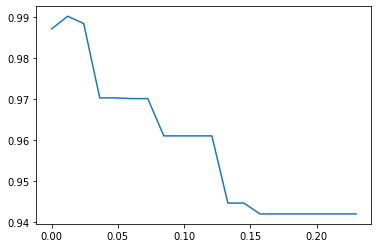

In [34]:
# Exploring thresholds through learning curves
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

RFC_ = RFC(n_estimators = 10,random_state = 42) 

threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)

score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

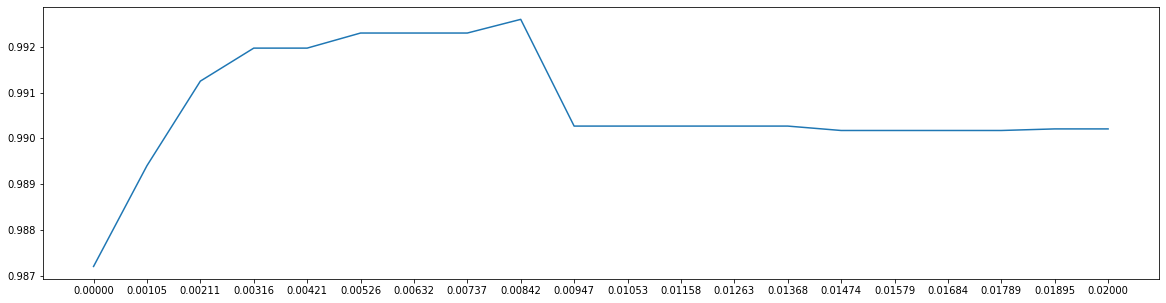

In [35]:
# Refine the learning curve
score2 = []
for i in np.linspace(0,0.02,20):
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.02,20),score2)
plt.xticks(np.linspace(0,0.02,20))
plt.show()

It can be seen that the model scores are highest when the threshold value is about 0.0063.

### Feature Selection

In [36]:
sfm = SelectFromModel(RFC_,threshold=0.0063)
X_em = sfm.fit(X,y)
features_keeped = X.columns[X_em.get_support()]
X = X[features_keeped]
X.shape

(291050, 17)

### Check the feature importance ranking

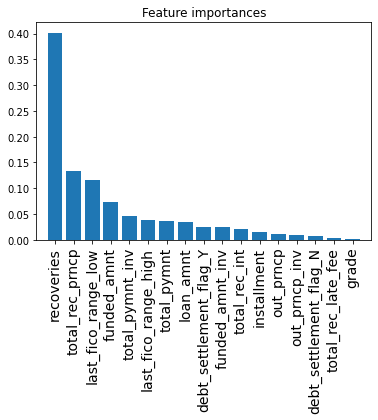

In [37]:
RFC_.fit(X,y)
importances = RFC_.feature_importances_
names = X.columns

# Returns the value of importances sorted from largest to smallest, [::-1] means reverse order
indices = np.argsort(importances)[::-1]
fig = plt.figure()
plt.title('Feature importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names[indices],rotation='vertical',fontsize=14)
plt.xlim([-1, X.shape[1]])
plt.show()

### Filtration method

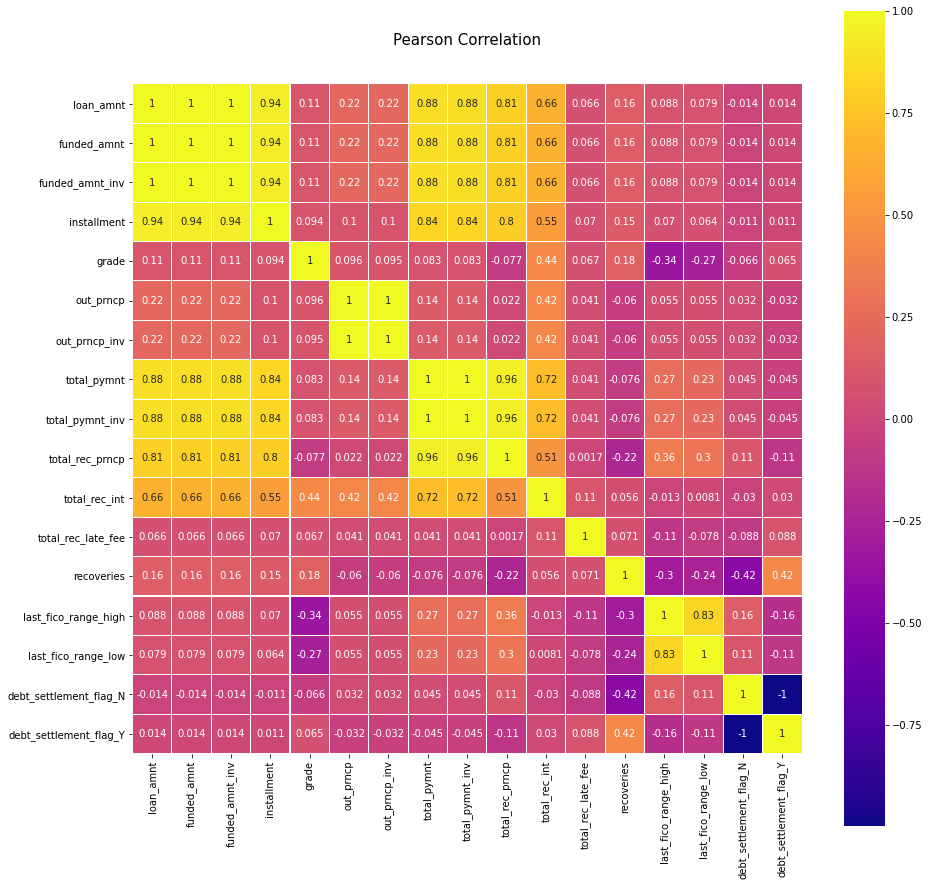

In [38]:
corr = X.corr()
colormap = plt.cm.plasma
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [39]:
# Remove partial features with correlation above 0.85
drop_list = ['funded_amnt','funded_amnt_inv','installment',
             'total_pymnt_inv',
             'total_rec_prncp','last_fico_range_high',
             'last_fico_range_low']
X = X.drop(drop_list,axis = 1)
X.shape

(291050, 10)

In [40]:
X.columns

Index(['loan_amnt', 'grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'debt_settlement_flag_N', 'debt_settlement_flag_Y'],
      dtype='object')

In [41]:
# After filtering, the number of features dropped from 18 to 10.

# Model Training

## Handling unbalanced samples

In [42]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 238691, 1.0: 52359})


In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Boosting the number of minority category samples with SMOTE to reach 30% of the majority sample size
over = SMOTE(sampling_strategy=0.3)
# Use RandomUnderSampler to reduce the number of majority category samples to 40% more than the number of minority samples
under = RandomUnderSampler(sampling_strategy=0.4)
# Integration with pineline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# Transitioning
X_resample, y_resample = pipeline.fit_resample(X, y)
counter = Counter(y_resample)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 179017, 1.0: 71607})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

model = DecisionTreeClassifier(random_state = 42)

In [45]:
def evaluate(data_X, data_y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model,data_X,data_y,scoring='roc_auc',cv=cv,n_jobs=-1)
    print('Mean ROC AUC:%.3f'%(mean(scores)))

In [46]:
evaluate(X,y)

Mean ROC AUC:0.984


In [47]:
evaluate(X_resample,y_resample)

Mean ROC AUC:0.986


## Model Evaluation

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resample,y_resample,test_size=1/3,random_state=42)

### RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rnd_clf.fit(X_train,Y_train)
rnd_clf.score(X_test,Y_test)

0.9919681118479328

### SGDClassifier

In [50]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=20)
sgd_clf.fit(X_train,Y_train)
sgd_clf.score(X_test,Y_test)

0.9604749706734337

### LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 20)
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9715113356156185

### GBDT

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gdbt_clf = GradientBoostingClassifier(random_state = 20)
gdbt_clf.fit(X_train,Y_train)
gdbt_clf.score(X_test,Y_test)

0.974515812405736

### SVC

In [53]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,Y_train)
svm_clf.score(X_test,Y_test)

### AdaBoostClassifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train,Y_train)
ada_clf.score(X_test,Y_test)

0.9709966244523712

### LGBMClassifier

In [55]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train,Y_train)
lgbm_clf.score(X_test,Y_test)

0.989226975652965

### XGBClassifier

In [56]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,Y_train)
xgb_clf.score(X_test,Y_test)

0.9743003519187954

### KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knc_clf = KNeighborsClassifier()
knc_clf.fit(X_train,Y_train)
knc_clf.score(X_test,Y_test)

0.9896578966268463

## Stacking

### Defining the Stacking Model

In [59]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('SVC', svm_clf))
    level0.append(('KNC', knc_clf))
    level0.append(('forest', rnd_clf))
    level0.append(('ABC', ada_clf))
    level0.append(('XGB', xgb_clf))
    
    level1 = lr_clf
    model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 10)
    return model

model_stack = get_stacking()

### Model Evaluation

In [60]:
model_stack.fit(X_train, Y_train).score(X_test, Y_test)

0.9929975341744273